Epoch 1/10
625/625 [==============================] - 245s 391ms/step - loss: 0.5219 - accuracy: 0.7319 - val_loss: 0.4742 - val_accuracy: 0.7706
Epoch 2/10
625/625 [==============================] - 232s 372ms/step - loss: 0.3337 - accuracy: 0.8648 - val_loss: 0.3279 - val_accuracy: 0.8672
Epoch 3/10
625/625 [==============================] - 225s 361ms/step - loss: 0.2810 - accuracy: 0.8888 - val_loss: 0.3289 - val_accuracy: 0.8630
Epoch 4/10
625/625 [==============================] - 223s 357ms/step - loss: 0.2379 - accuracy: 0.9077 - val_loss: 0.3362 - val_accuracy: 0.8700
Epoch 5/10
625/625 [==============================] - 228s 364ms/step - loss: 0.1998 - accuracy: 0.9246 - val_loss: 0.3301 - val_accuracy: 0.8726
Epoch 6/10
625/625 [==============================] - 224s 359ms/step - loss: 0.1803 - accuracy: 0.9326 - val_loss: 0.3912 - val_accuracy: 0.8502
Epoch 7/10
625/625 [==============================] - 227s 363ms/step - loss: 0.1509 - accuracy: 0.9441 - val_loss: 0.4176 -

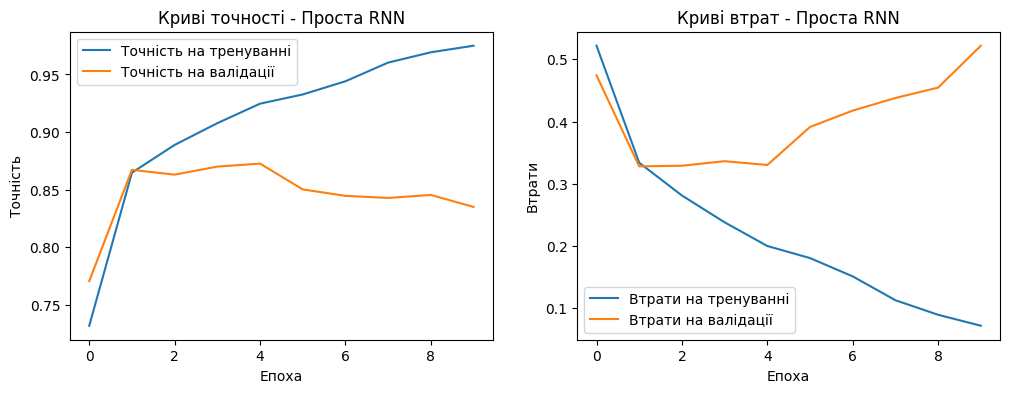

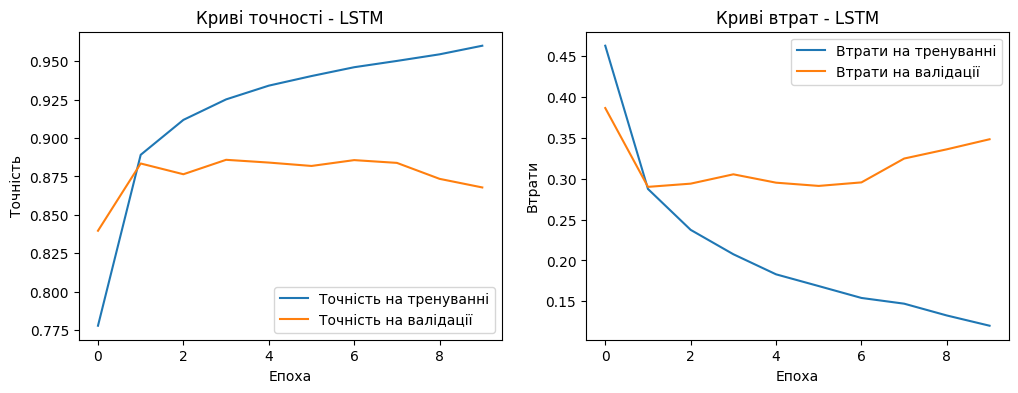

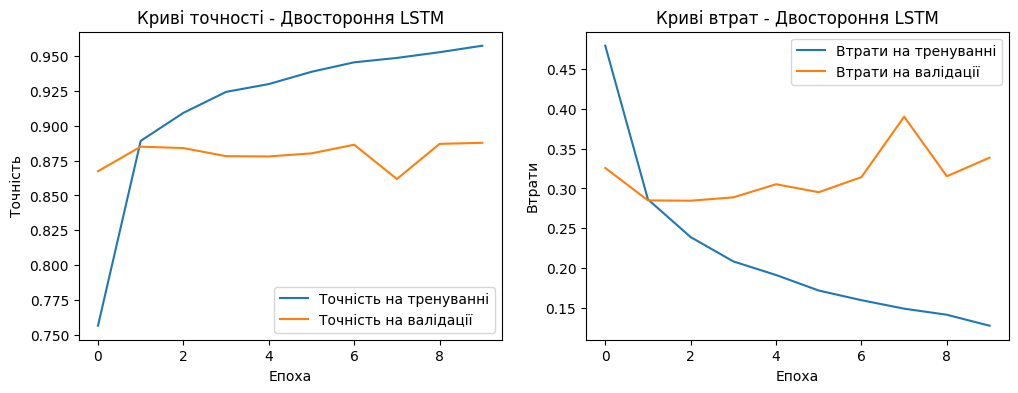

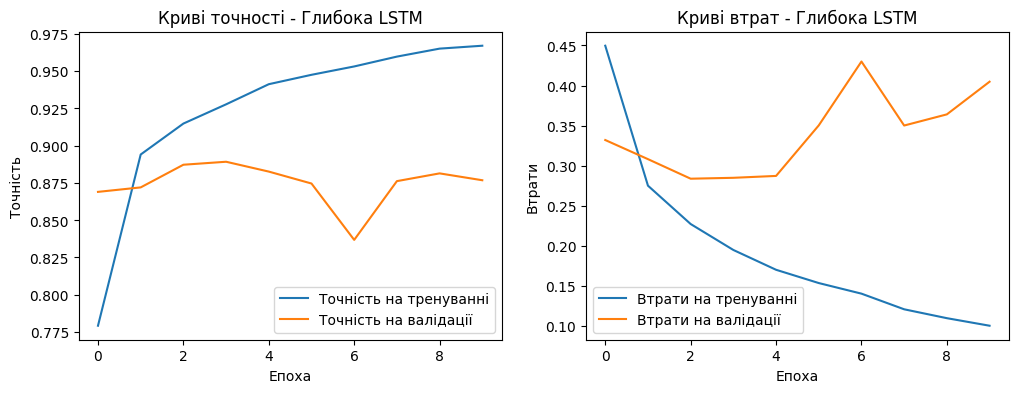

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Bidirectional, Dropout

# Параметри
max_features = 10000  # Кількість слів, що розглядаються як особливості
maxlen = 500  # Обмеження кількості слів в тексті
batch_size = 32

# Завантаження даних
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Підготовка даних
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Створення та навчання моделей
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn = model_rnn.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = model_lstm.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

model_bilstm = Sequential()
model_bilstm.add(Embedding(max_features, 32))
model_bilstm.add(Bidirectional(LSTM(32)))
model_bilstm.add(Dense(1, activation='sigmoid'))

model_bilstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_bilstm = model_bilstm.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

model_deep_lstm = Sequential()
model_deep_lstm.add(Embedding(max_features, 32))
model_deep_lstm.add(LSTM(32, return_sequences=True))
model_deep_lstm.add(LSTM(32))
model_deep_lstm.add(Dense(1, activation='sigmoid'))

model_deep_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_deep_lstm = model_deep_lstm.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

# Оцінка моделей на тестових даних
test_loss_rnn, test_acc_rnn = model_rnn.evaluate(x_test, y_test)
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(x_test, y_test)
test_loss_bilstm, test_acc_bilstm = model_bilstm.evaluate(x_test, y_test)
test_loss_deep_lstm, test_acc_deep_lstm = model_deep_lstm.evaluate(x_test, y_test)

print(f'Точність простої RNN на тестових даних: {test_acc_rnn:.4f}')
print(f'Точність LSTM на тестових даних: {test_acc_lstm:.4f}')
print(f'Точність двосторонньої LSTM на тестових даних: {test_acc_bilstm:.4f}')
print(f'Точність глибокої LSTM на тестових даних: {test_acc_deep_lstm:.4f}')

# Порівняння результатів
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Точність на тренуванні')
    plt.plot(history.history['val_accuracy'], label='Точність на валідації')
    plt.xlabel('Епоха')
    plt.ylabel('Точність')
    plt.legend()
    plt.title(f'Криві точності - {title}')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Втрати на тренуванні')
    plt.plot(history.history['val_loss'], label='Втрати на валідації')
    plt.xlabel('Епоха')
    plt.ylabel('Втрати')
    plt.legend()
    plt.title(f'Криві втрат - {title}')

    plt.show()

plot_history(history_rnn, 'Проста RNN')
plot_history(history_lstm, 'LSTM')
plot_history(history_bilstm, 'Двостороння LSTM')
plot_history(history_deep_lstm, 'Глибока LSTM')

Висновки, які можна зробити на основі цих даних:

Проста RNN: Має найнижчу точність серед усіх моделей (0.8347). Це пояснюється обмеженою здатністю простої RNN обробляти довгі залежності в текстових даних.

LSTM: Показує значне покращення порівняно з простою RNN (0.8642). LSTM здатна краще обробляти довгі залежності завдяки механізму пам'яті.

Двостороння LSTM: Має найвищу точність серед усіх моделей (0.8728). Двостороння LSTM враховує контекст як зліва, так і справа від поточного слова, що дозволяє краще зрозуміти зміст рецензії.

Глибока LSTM: Показує результат, близький до LSTM (0.8671), але трохи гірший за двосторонню LSTM. Глибока LSTM може бути більш складною для навчання та вимагати більше обчислювальних ресурсів, але не завжди призводить до покращення точності.

Загалом, двостороння LSTM є найкращим вибором для задачі класифікації рецензій на IMDB, оскільки вона найкраще враховує контекст і показує найвищу точність.